In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore')
# Load the data
data = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [7]:
print("Number of rows is = ", data.shape[0], " \nNumber of columns is = " , data.shape[1]) 

Number of rows is =  400  
Number of columns is =  5


In [14]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
# Display basic info
print(data.info())
print('#'*50)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
##################################################
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.00000

In [9]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
User ID,400.000000,15691539.757500,71658.321581,15566689.000000,15626763.750000,15694341.500000,15750363.000000,15815236.000000
Age,400.000000,37.655000,10.482877,18.000000,29.750000,37.000000,46.000000,60.000000
EstimatedSalary,400.000000,69742.500000,34096.960282,15000.000000,43000.000000,70000.000000,88000.000000,150000.000000
Purchased,400.000000,0.357500,0.479864,0.000000,0.000000,0.000000,1.000000,1.000000


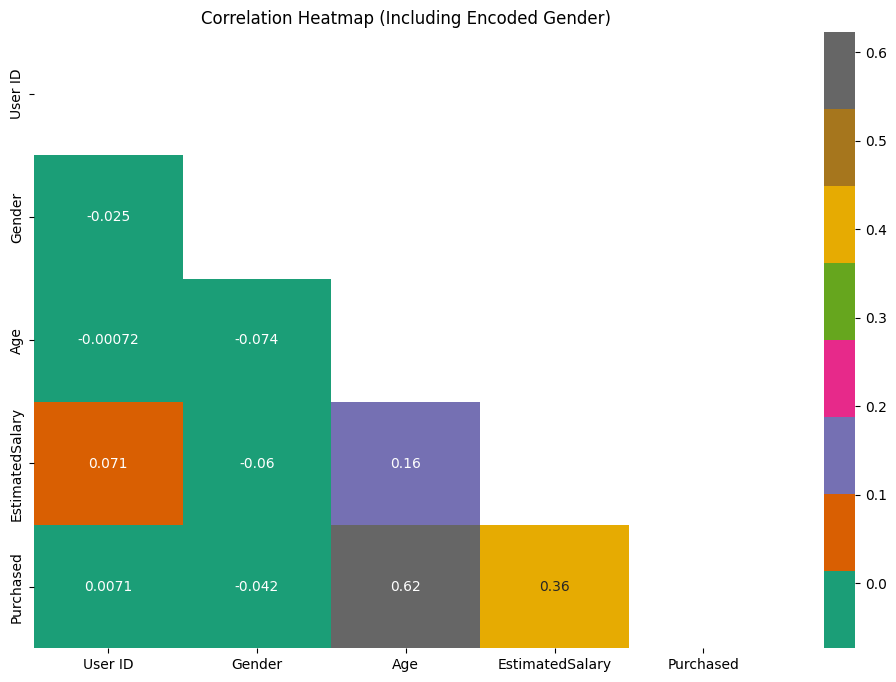

In [37]:
# plt.figure(figsize=(10, 5))
# numeric_data = data.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns
# mask = np.triu(np.ones_like(numeric_data.corr(), dtype=bool))
# sns.heatmap(numeric_data.corr(), mask=mask, annot=True, cmap='Dark2')
# plt.title('Correlation Heatmap (Numeric Features Only)')
# plt.show()

from sklearn.preprocessing import LabelEncoder

plt.figure(figsize=(12, 8))
encoded_data = data.copy()
encoded_data['Gender'] = LabelEncoder().fit_transform(encoded_data['Gender'])  # Male=1, Female=0
mask = np.triu(np.ones_like(encoded_data.corr(), dtype=bool))
sns.heatmap(encoded_data.corr(), mask=mask, annot=True, cmap='Dark2')
plt.title('Correlation Heatmap (Including Encoded Gender)')
plt.show()

In [40]:
data['Purchased'].value_counts()


Purchased
0    257
1    143
Name: count, dtype: int64

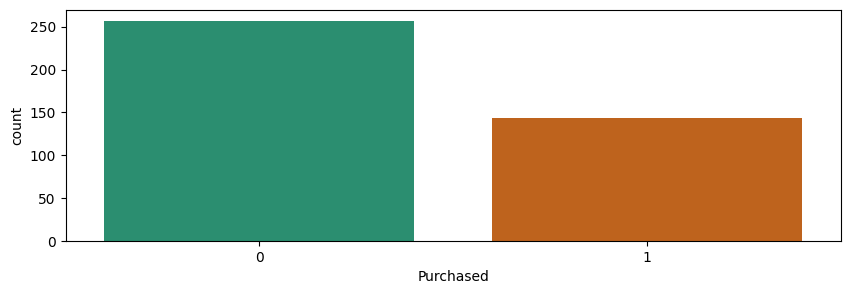

In [42]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Purchased",data=data, palette="Dark2")
plt.show()

<Figure size 1000x300 with 0 Axes>

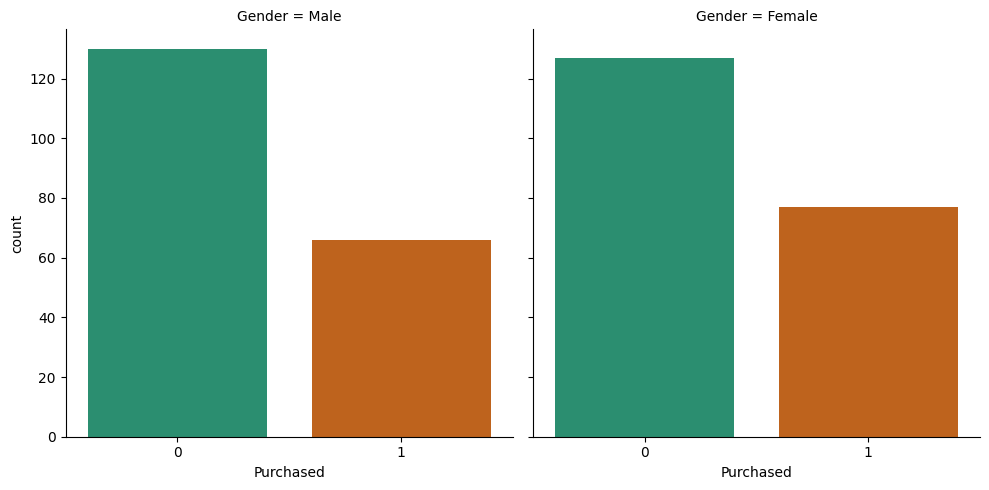

In [43]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Purchased', col='Gender', kind='count', data=data,palette="Dark2");
plt.show()


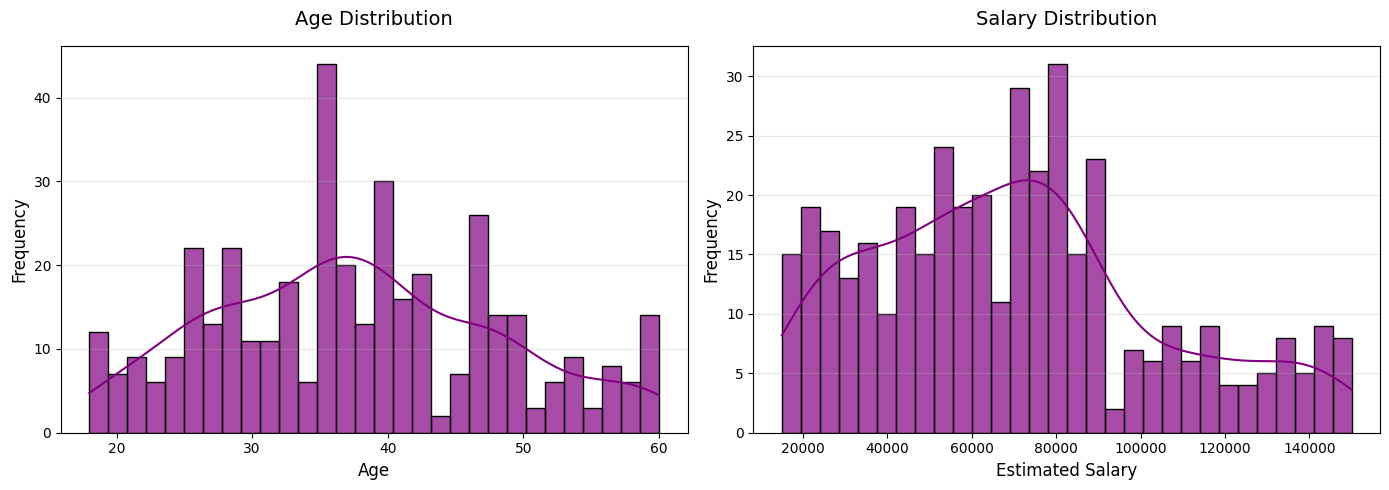

In [56]:
plt.figure(figsize=(14, 5))  # Wider figure to accommodate two plots

# First subplot - Age distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.histplot(data['Age'], kde=True, color='purple', bins=30, edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Second subplot - Salary distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.histplot(data['EstimatedSalary'], kde=True, color='purple', bins=30, edgecolor='black', alpha=0.7)
plt.title('Salary Distribution', fontsize=14, pad=15)
plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

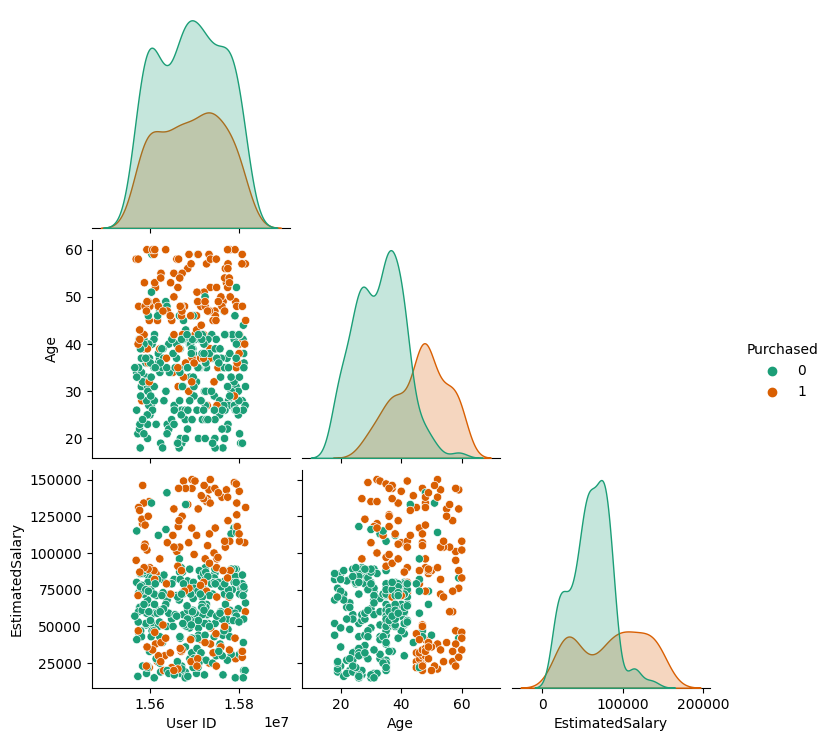

In [57]:
sns.pairplot(data , hue = 'Purchased',palette='Dark2',corner=True )

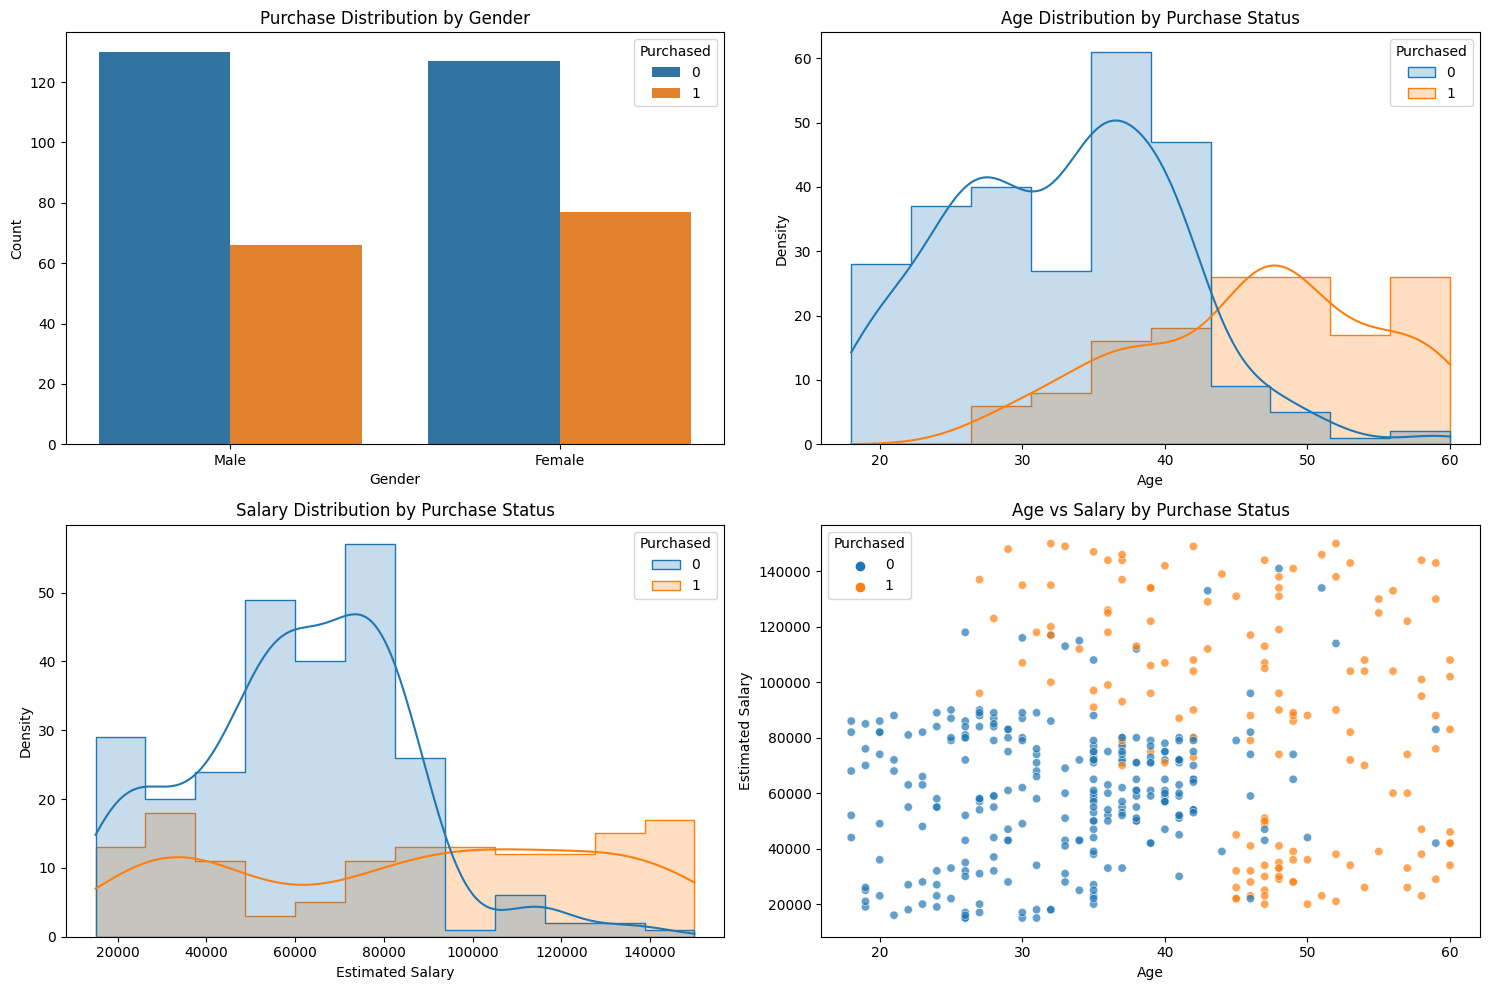

In [12]:
# Visualizations
plt.figure(figsize=(15, 10))

# 1. Distribution of Purchases by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', hue='Purchased', data=data)
plt.title('Purchase Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# 2. Age distribution by Purchase status
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Age', hue='Purchased', element='step', kde=True)
plt.title('Age Distribution by Purchase Status')
plt.xlabel('Age')
plt.ylabel('Density')

# 3. Salary distribution by Purchase status
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='EstimatedSalary', hue='Purchased', element='step', kde=True)
plt.title('Salary Distribution by Purchase Status')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')

# 4. Age vs Salary colored by Purchase status
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='Age', y='EstimatedSalary', hue='Purchased', alpha=0.7)
plt.title('Age vs Salary by Purchase Status')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.tight_layout()
plt.show()

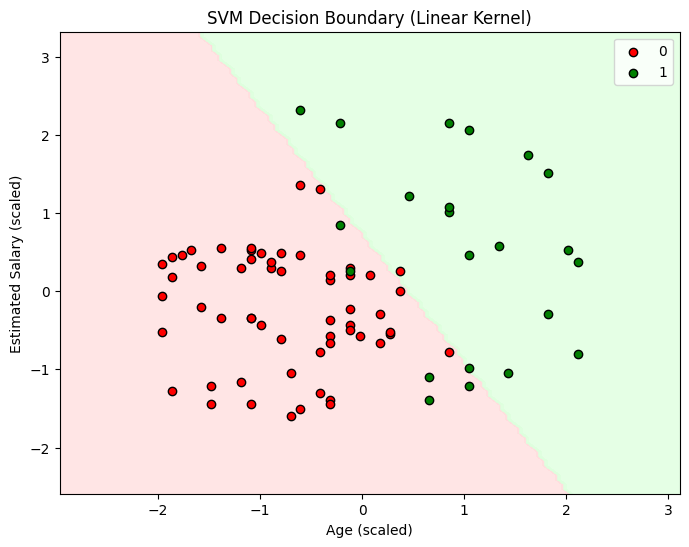

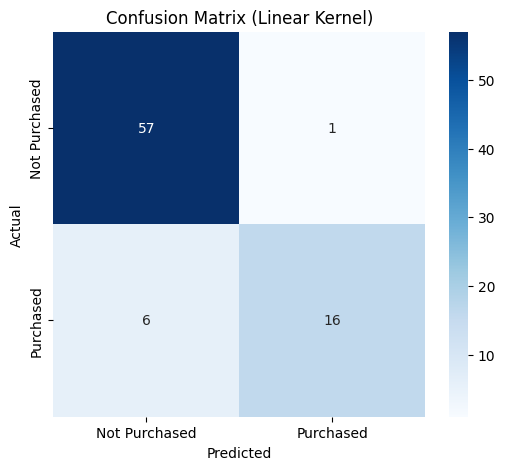


Linear Kernel SVM Results:

Confusion Matrix:
[[57  1]
 [ 6 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80


####################################################################################################



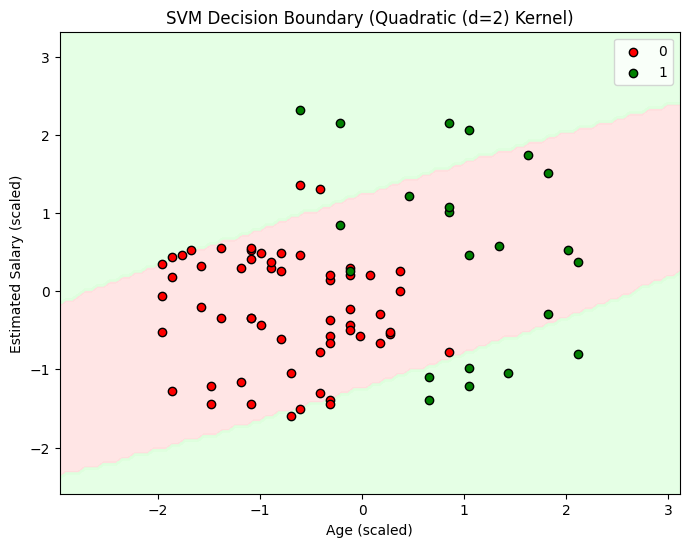

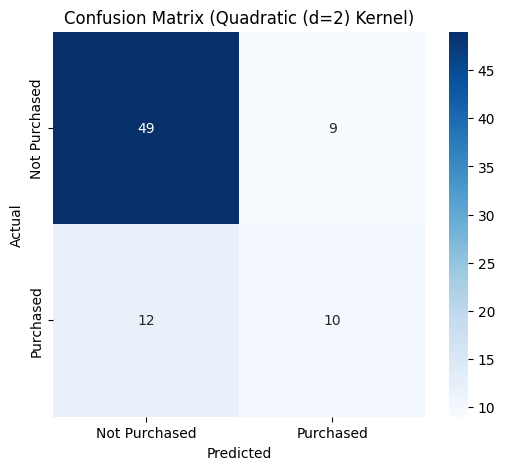


Quadratic (d=2) Kernel SVM Results:

Confusion Matrix:
[[49  9]
 [12 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        58
           1       0.53      0.45      0.49        22

    accuracy                           0.74        80
   macro avg       0.66      0.65      0.66        80
weighted avg       0.73      0.74      0.73        80


####################################################################################################



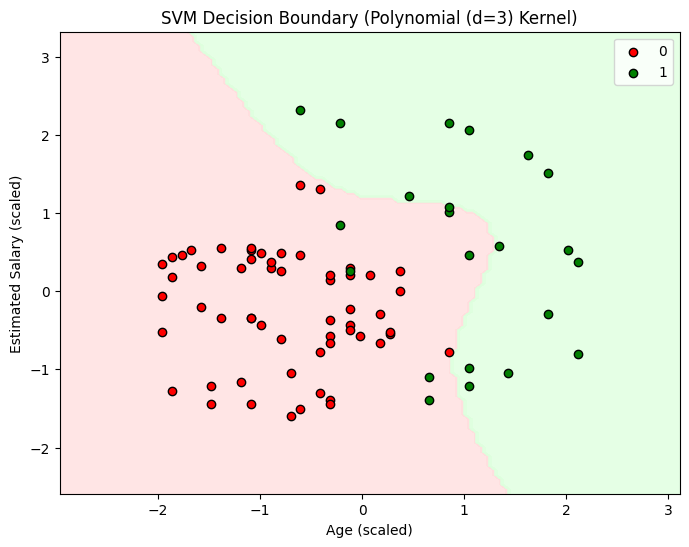

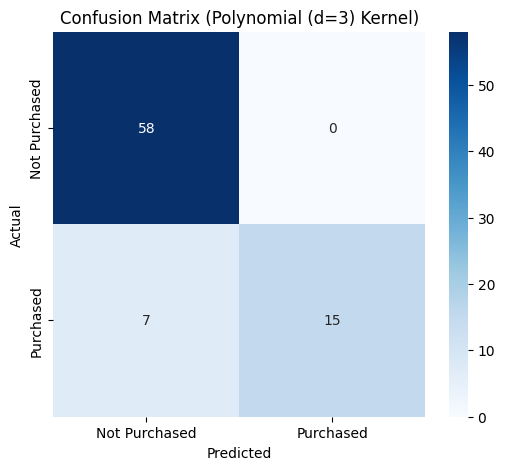


Polynomial (d=3) Kernel SVM Results:

Confusion Matrix:
[[58  0]
 [ 7 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.68      0.81        22

    accuracy                           0.91        80
   macro avg       0.95      0.84      0.88        80
weighted avg       0.92      0.91      0.91        80


####################################################################################################



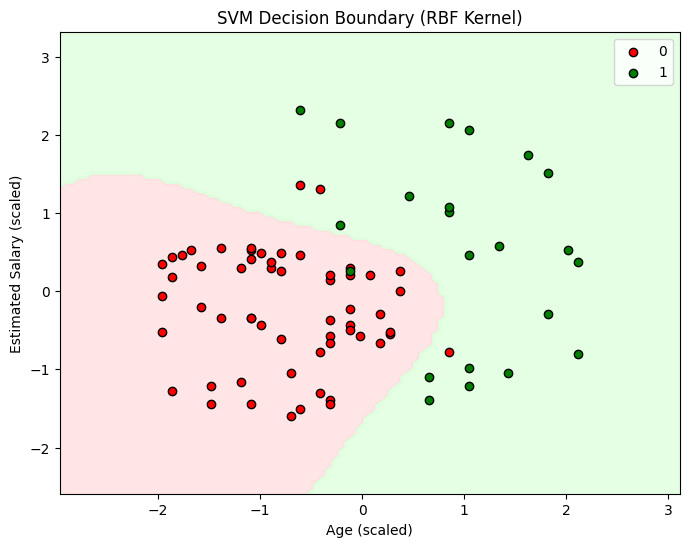

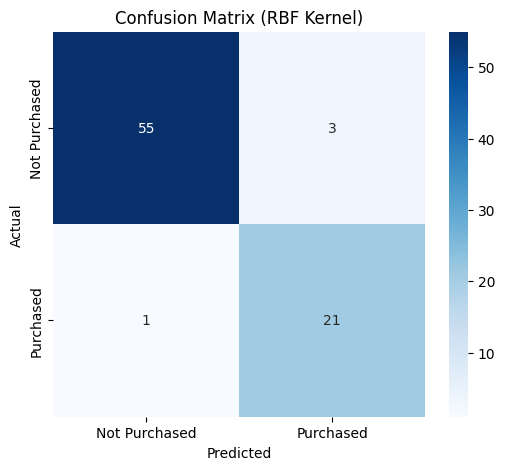


RBF Kernel SVM Results:

Confusion Matrix:
[[55  3]
 [ 1 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80


####################################################################################################



In [53]:
import seaborn as sns

# Function to train SVM and evaluate with separate visualizations
def evaluate_svm(kernel_name, kernel_type, degree=3):
    # Create and train classifier
    if kernel_type == 'poly':
        classifier = SVC(kernel=kernel_type, degree=degree, random_state=0)
    else:
        classifier = SVC(kernel=kernel_type, random_state=0)
    
    classifier.fit(X_train, y_train)
    
    # Predictions
    y_pred = classifier.predict(X_test)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification report
    cr = classification_report(y_test, y_pred)
    
    # Plot 1: Decision Boundary (separate figure)
    plt.figure(figsize=(8, 6))
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.linspace(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 100),
                         np.linspace(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 100))
    plt.contourf(X1, X2, classifier.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(['#FFDDDD', '#DDFFDD']))
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=['red', 'green'][i], label=j, edgecolor='black')
    
    plt.title(f'SVM Decision Boundary ({kernel_name} Kernel)')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.legend()
    plt.show()
    
    # Plot 2: Confusion Matrix (separate figure)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Purchased', 'Purchased'],
                yticklabels=['Not Purchased', 'Purchased'])
    plt.title(f'Confusion Matrix ({kernel_name} Kernel)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Print results
    print(f"\n{kernel_name} Kernel SVM Results:")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print("\n" + "#"*100 + "\n")  # Separator line after classification report only
    
    return classifier, cm, cr

# Evaluate different kernels
linear_clf, linear_cm, linear_cr = evaluate_svm('Linear', 'linear')
quadratic_clf, quadratic_cm, quadratic_cr = evaluate_svm('Quadratic (d=2)', 'poly', degree=2)
poly_clf, poly_cm, poly_cr = evaluate_svm('Polynomial (d=3)', 'poly', degree=3)
rbf_clf, rbf_cm, rbf_cr = evaluate_svm('RBF', 'rbf')

In [54]:
from sklearn.metrics import f1_score, roc_auc_score

# Enhanced metrics function
def get_enhanced_metrics(y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred)
    }
    return metrics

# Calculate metrics for all kernels
metrics = {
    'Linear': get_enhanced_metrics(y_test, linear_clf.predict(X_test)),
    'Quadratic': get_enhanced_metrics(y_test, quadratic_clf.predict(X_test)),
    'Polynomial (d=3)': get_enhanced_metrics(y_test, poly_clf.predict(X_test)),
    'RBF': get_enhanced_metrics(y_test, rbf_clf.predict(X_test))
}

# Create comparison DataFrame
comparison_df = pd.DataFrame(metrics).T
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# Display the comparison
print("\n=== Comprehensive Model Comparison ===")
print(comparison_df.to_markdown(floatfmt=".3f", tablefmt="grid"))

# Print best model
best_model = comparison_df.index[0]
print(f"\nBest performing model: {best_model} with accuracy = {comparison_df.loc[best_model, 'Accuracy']:.3f}")


=== Comprehensive Model Comparison ===
+------------------+------------+-------------+----------+------------+-----------+
|                  |   Accuracy |   Precision |   Recall |   F1 Score |   ROC AUC |
+==================+============+=============+==========+============+===========+
| RBF              |      0.950 |       0.875 |    0.955 |      0.913 |     0.951 |
+------------------+------------+-------------+----------+------------+-----------+
| Linear           |      0.912 |       0.941 |    0.727 |      0.821 |     0.855 |
+------------------+------------+-------------+----------+------------+-----------+
| Polynomial (d=3) |      0.912 |       1.000 |    0.682 |      0.811 |     0.841 |
+------------------+------------+-------------+----------+------------+-----------+
| Quadratic        |      0.738 |       0.526 |    0.455 |      0.488 |     0.650 |
+------------------+------------+-------------+----------+------------+-----------+

Best performing model: RBF with acc

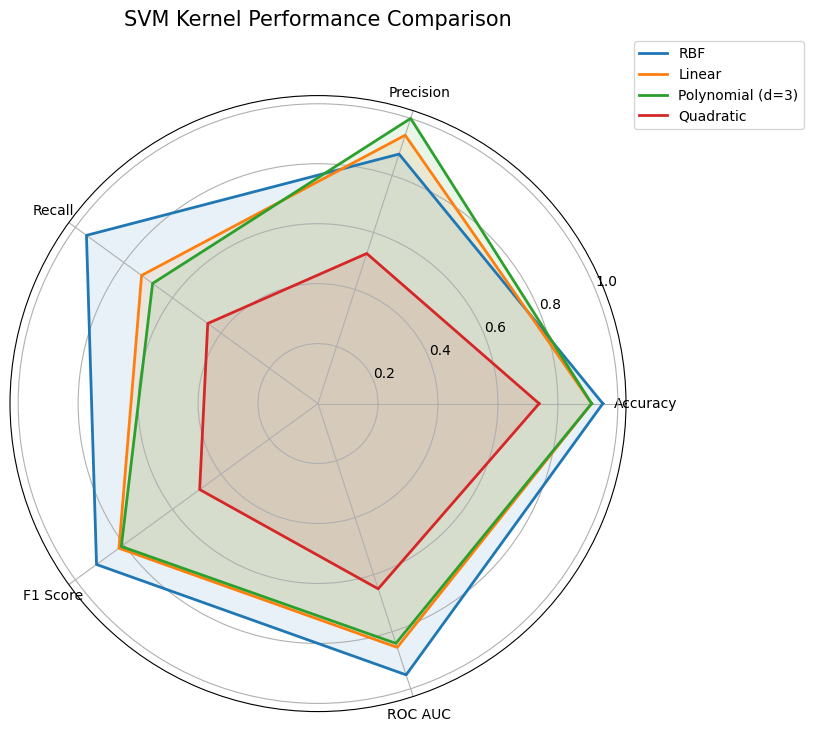

In [55]:
# Radar chart comparison
def plot_radar_chart(metrics_df):
    categories = list(metrics_df.columns)
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    
    for model in metrics_df.index:
        values = metrics_df.loc[model].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_title('SVM Kernel Performance Comparison', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

plot_radar_chart(comparison_df)